<a href="https://colab.research.google.com/github/evaldoflorestal/TipologiaFlorestal/blob/main/An%C3%A1lise_Florestal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INTRODUÇÃO#


Neste trabalho, realizaremos uma análise do inventário florestal de uma floresta nativa.

O objetivo é de mostrar como a linguagem Python e suas bibliotecas podem ser empregados nas análises de dados dos mais variados setores, no presente caso, setor florestal.

Diante disso, vamos utilizar uma base de dados para fins de estudo e com ele vamos classificar a ocorrência das espécies no levantamento, para que os relatórios gerados, possam servir de base ao Engenheiro Florestal, para classificar a vegetação levantada de acordo com a legislação vigente e em atendimento ao que exige os orgãos competentes quanto a: Tipologia, Planos de Exploração Florestal e demais estudos técnicos.

O presente trabalho foi conduzido primeiramente com dados levantados em campo em vegetação caracterizada como Cerrado em uma propriedade localizada no estado de Mato Grosso. Foram estabelecidas um total de 11 (onze) parcelas permanentes, equidistantes entre si (200m) e distantes a 100m das estradas, com dimensões de 10m x 100m (1000 m²) cada uma, totalizando uma área amostrada de 1,10 hectares.

#OBJETIVO#

O objetivo principal deste trabalho é realizar uma análise mais ágil e eficiente do inventário florestal, utilizando o Python e suas bibliotecas.



#CONSIDERAÇÕES INICIAIS SOBRE O ALGORITMO#

Considerando que atualmente, as análises demandam tempo e muitas delas exigem o retorno do profissional a campo, espera-se que este trabalho sirva como uma ferramenta para agilizar os levantamentos futuros, atendendo aos parâmetros estatísticos requeridos para fins de licenciamento ainda em campo, uma vez que o algoritimo realiza os calculos necessários e demonstra as principais espécies que mais ocorrem naquele local, possibilitando ao profissional identifica-las e cataloga-las se for necessário.

Contudo, para essa finalidade, se faz necessário utilizar uma planilha eletronica (Tablet) e posteriormente inserir os dados em um computador (notebook).

#Nota importante:#
É necessário inserir informações corretamente em planilha.

**1 - Não inserir espaços adicionais para a mesma espécie**, seja no inicio ou final.

**2 - Não util**izar caixa alta e outra baixa para a mesma espécie, o algoritmo é "sensitive case" - quando um programa diferencia caracteres maiúsculos de minúsculos. Com isso evita-se de classificar duas ou mais vezes a mesma espécie.

Importante destacar aqui, que embora o termo de referência padrão da SEMA (2023)não exigir parâmetros estatísticos, o algoritmo é capaz de realizar e apresentar essas informações, que até então eram feitas também em escritório, tais como: erro de amostragem, variância, coeficiente de variação, número ideal e admissível de parcelas necessárias e entre outros.

Foram incluídos calculos de Equabilidade (Pielou), Índice de Shanon-Wiener e Similaridades (Sorensen e Jaccard).

#IMPORTANDO AS BIBLIOTECAS NECESSÁRIAS

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

#INTRODUZINDO PLANILHA DE CAMPO#

Nesta parte é importante utilizar uma planilha padrão, pois as colunas já estão pre-definidas e atenderá de forma integral em nosso código abaixo.

Faça o download do modelo de planilha clicando no link abaixo:
[Planilha de campo](https://docs.google.com/spreadsheets/d/1B_KLic6mixDUSVrSlSsuUk-vU3OV9oIt/edit?usp=drive_link&ouid=117422663938678813166&rtpof=true&sd=true)

**Importante destacar** que os dados a serem inseridos na planilha devem ser obedecer o mais absoluto rigor: Respeitando as casas decimais (nesta etapa podem utilizar virgulas), Evitar erros ortográficos para a mesma espécie e entre outros pontos importantes que possam impactar nos calculos.

In [ ]:
tipologia = pd.read_excel('/content/Planilhadecampo.xlsx')
tipologia

,Amostra,Num,Familia,Nome_cientifico,Nome_Popular,CAP,CAP.1,CAP.2,CAP.3,CAP.4,CAP.5,CAP.6,CAP.7,CAP_Calculado,ALTURA
0,1,9538,Vochysiaceae,Salvertia convallariodora A. St.-Hil.,Colher de vaqueiro,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,2.0
1,1,9544,Vochysiaceae,Salvertia convallariodora A. St.-Hil.,Colher de vaqueiro,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.000000,2.5
2,1,9534,Styracaceae,Styrax ferrugineus Nees & Mart.,Laranjinha,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.000000,2.0
3,1,9535,Styracaceae,Styrax ferrugineus Nees & Mart.,Laranjinha,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.000000,2.5
4,1,9543,Dilleniaceae,Curatella americana L.,Lixeira,33,30.0,NaN,NaN,NaN,NaN,NaN,NaN,44.598206,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,11,9826,Fabaceae,Andira cujabensis Benth.,Morcegueira,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.000000,3.0
295,11,9828,Vochysiaceae,Qualea parviflora Mart.,Pau Terrinha Rugoso,43,42.0,NaN,NaN,NaN,NaN,NaN,NaN,60.108236,3.0
296,11,9823,Fabaceae,Bowdichia virgilioides Kunth,Sucupira preta,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,2.0
297,11,9825,Fabaceae,Bowdichia virgilioides Kunth,Sucupira preta,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,3.0


In [ ]:
# Neste ponto vamos realizar um tratamento básico nas colunas especificadas, para fins de retirar alguns espaços vazios nos dados de entrada, possíveis erros.
# Aqui podemos inserir um código para as mesmas colunas, de deixarem todas as letras em minusculos ou maiusculos, que também ajudaria a diminuir os erros. Mas não vamos tratar isso aqui (não neste momento).

tipologia['Familia'] = tipologia['Familia'].str.strip()
tipologia['Nome_cientifico'] = tipologia['Nome_cientifico'].str.strip()
tipologia['Nome_Popular'] = tipologia['Nome_Popular'].str.strip()

#Separando espécies exclusivas

Vamos separar, para cada amostra, a ocorrência de espécies que só ocorrem exclusivamente nelas, ou seja, que não ocrrem em nenhuma outra amostra.

Por fim, vamos criar um arquivo em excel e que poderá ser baixado posteriormente.

In [ ]:
from itertools import combinations

# Criar um dicionário para armazenar as informações das espécies exclusivas de cada amostra
exclusivas_por_amostra = {}

for amostra in tipologia['Amostra'].unique():
    sub_df = tipologia[tipologia['Amostra'] == amostra]
    species_set = set(sub_df['Nome_Popular'])

    outras_amostras = tipologia[(tipologia['Amostra'] != amostra)]['Nome_Popular']
    outras_species_set = set(outras_amostras)

    exclusivas = species_set - outras_species_set
    exclusivas_por_amostra[amostra] = exclusivas

# Criar uma lista de dicionários com as informações das espécies exclusivas de cada amostra
data = []
for amostra, exclusivas in exclusivas_por_amostra.items():
    for especie in exclusivas:
        especie_info = tipologia[(tipologia['Amostra'] == amostra) & (tipologia['Nome_Popular'] == especie)].iloc[0]
        data.append({
            'Amostra': amostra,
            'Especie_exclusiva': especie,
            'Nome Científico': especie_info['Nome_cientifico'],
            'Família': especie_info['Familia']
        })

# Criar um novo DataFrame com as informações das espécies exclusivas
especies_exclusivas = pd.DataFrame(data)


# Salvando Planilha campo em um arquivo Excel - O arquivo foi criado.
especies_exclusivas.to_excel('especies_exclusivas_por_amostras.xlsx', index=False)

# Exibir o novo DataFrame - Semelhante ao que foi criado em Excel (xlsx).
especies_exclusivas

,Amostra,Especie_exclusiva,Nome Científico,Família
0,1,Laranjinha,Styrax ferrugineus Nees & Mart.,Styracaceae
1,2,Pombeiro,Tapirira guianensis Aubl.,Anacardiaceae
2,3,Lixeirinha,Davilla elliptica A.St.-Hil.,Dilleniaceae
3,3,Fruto de Veado,Pouteria ramiflora (Mart.) Radlk.,Sapotaceae
4,3,Pau Doce,Vochysia rufa Mart.,Vochysiaceae
5,3,Pimenta de Macaco,Xylopia aromatica (Lam.) Mart.,Annonaceae
6,4,Pau Terrão,Qualea grandiflora Mart.,Vochysiaceae
7,4,Sobre,Emmotum nitens (Benth.) Miers,Metteniusaceae
8,4,Vinhático,Plathymenia reticulata Benth.,Fabaceae
9,4,ginipapo de cavalo,ginipapo de cavalo,ginipapo de cavalo


#Contabilizando espécies exclusivas total

In [ ]:
especies_exclusivas.count()

Amostra              18
Especie_exclusiva    18
Nome Científico      18
Família              18
dtype: int64

#Contabilizando espécies exclusivas de cada amostra

In [ ]:
especies_exclusivas["Amostra"].value_counts().sort_index()

1    1
2    1
3    4
4    4
6    4
7    3
9    1
Name: Amostra, dtype: int64

Vimos acima que das 11 amostras levantadas em campo, apenas as parcelas: 5, 8, 10 e 11 não tiveram espécies exclusivas.

#EQUABILIDADE (PIELOU) e DIVERSIDADE DE SHANNON


**EQUABILIDADE (PIELOU)**

Equidade se refere à distribuição dos indivíduos entre as espécies, sendo proporcional à diversidade e inversamente proporcional a dominância. A medida de Equidade ou Equitabilidade, compara a diversidade de Shanon-Wiener com a distribuição das espécies observadas que maximiza a diversidade. Se o indice estiver próximo de  (um), indica que as espécies estão relativamente bem distribuídas e que não há uma espécie dominante em nenhuma das amostras. Este índice é obtido através da equação:

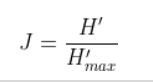

Onde H’ é o Índice de Shanon-Wiener e Hmax’ é dado pela seguinte expressão:

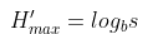

Onde **s** é o número de espécies amostradas; Logb = logaritmo na base b (2 ou 2,718282 ou 10).


**Fonte:** Rodrigues, W.C., 2023. Equidade J (Pielou). DivEs - Diversidade de Espécies v.4.21 (AntSoft Systems On Demand) - Guia do Usuário. Disponível em: <https://dives.ebras.bio.br>. Acesso em: 13/08/2023


In [ ]:
from scipy.stats import entropy

# Vamos criar dicionários para armazenar os índices de equabilidade de Pielou e a diversidade de Shannon
pielou_indices = {}
shannon_indices = {}

for amostra in tipologia['Amostra'].unique():
    sub_df = tipologia[tipologia['Amostra'] == amostra]['Nome_Popular']
    species_counts = sub_df.value_counts()

    # Calculando a diversidade de Shannon
    p = species_counts / len(sub_df)
    shannon_diversity = -np.sum(p * np.log(p))

    # Calculando o índice de equabilidade de Pielou
    pielou_index = shannon_diversity / np.log(len(species_counts))

    pielou_indices[amostra] = pielou_index
    shannon_indices[amostra] = shannon_diversity

# Criando um DataFrame com os índices de equabilidade de Pielou e a diversidade de Shannon
indices_df = pd.DataFrame({
    'Amostra': list(pielou_indices.keys()),
    'Índice de Equabilidade de Pielou': list(pielou_indices.values()),
    'Índice de Shannon': list(shannon_indices.values())
})

# Vamos exibir os índices de equabilidade de Pielou e a diversidade de Shannon
print(indices_df)

# Salvar o DataFrame em um arquivo Excel
nome_arquivo_excel = 'indices_equabilidade_divshannon.xlsx'
indices_df.to_excel(nome_arquivo_excel, index=False)
print(f"DataFrame salvo em {nome_arquivo_excel}")


    Amostra  Índice de Equabilidade de Pielou  Índice de Shannon
0         1                          0.941762           1.515708
1         2                          0.926939           2.134357
2         3                          0.741323           1.777614
3         4                          0.868930           2.461865
4         5                          0.926928           1.803719
5         6                          0.787790           2.360009
6         7                          0.858688           2.059044
7         8                          0.864974           0.950271
8         9                          0.847984           1.519383
9        10                          0.840563           1.846907
10       11                          0.942681           1.834372
DataFrame salvo em indices_equabilidade_shannon.xlsx


#SIMILARIDADE

**similaridades de Sørensen**

Vamos realizar os testes de similaridades entre as amostras através dos testes (Sorensen e Jaccard) com as combinações de cada amostras e assim, verificar o quão semelhantes as mesmas possam ser, **ou não**, devido as suas proximidades.

A maneira mais simples de medir a diversidade β entre pares de locais é pelo uso dos coeficientes de similaridade. Estes coeficientes comparam comunidades de forma qualitativa ou quantitativa (BARROS, 2007).

O índice de similaridade de Sorensen é pratico e bem simples de se mensurar. A equação é bem simples:

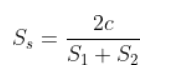

Onde:S1 = número de espécies na comunidade 1; S2 = número de espécies na comunidade 2; C = número de espécies comuns a ambas as comunidades.

**Fonte:** Rodrigues, W.C., 2023. Índice de Similaridade Sorensen. DivEs - Diversidade de Espécies v.4.21 (AntSoft Systems On Demand) - Guia do Usuário. Disponível em: <https://dives.ebras.bio.br>. Acesso em: 13/08/2023

In [ ]:
from itertools import combinations


# Criar um dicionário para armazenar as similaridades de Sørensen
sorensen_similarities = {}

for amostra1, amostra2 in combinations(tipologia['Amostra'].unique(), 2):
    sub_df1 = tipologia[tipologia['Amostra'] == amostra1]['Nome_Popular']
    sub_df2 = tipologia[tipologia['Amostra'] == amostra2]['Nome_Popular']

    intersection = len(set(sub_df1) & set(sub_df2))
    species_count_amostra1 = len(set(sub_df1))
    species_count_amostra2 = len(set(sub_df2))

    sorensen_similarity = (2 * intersection) / (species_count_amostra1 + species_count_amostra2)
    sorensen_similarities[(amostra1, amostra2)] = sorensen_similarity

# Criar um DataFrame com as similaridades de Sørensen
similaridades_df = pd.DataFrame({
    'Amostras': [f"{amostra1} - {amostra2}" for amostra1, amostra2 in sorensen_similarities.keys()],
    'Similaridade de Sørensen (%)': [similarity * 100 for similarity in sorensen_similarities.values()]
})

# Exibir as similaridades de Sørensen
print(similaridades_df)

# Salvar o DataFrame em um arquivo Excel
nome_arquivo_excel = 'similaridades_sorensen.xlsx'
similaridades_df.to_excel(nome_arquivo_excel, index=False)
print(f"DataFrame salvo em {nome_arquivo_excel}")


   Amostras  Similaridade de Sørensen (%)
0     1 - 2                     53.333333
1     1 - 3                     12.500000
2     1 - 4                     27.272727
3     1 - 5                     33.333333
4     1 - 6                     16.000000
5     1 - 7                      0.000000
6     1 - 8                     25.000000
7     1 - 9                     36.363636
8    1 - 10                     42.857143
9    1 - 11                     50.000000
10    2 - 3                      9.523810
11    2 - 4                     59.259259
12    2 - 5                     70.588235
13    2 - 6                     40.000000
14    2 - 7                     28.571429
15    2 - 8                     46.153846
16    2 - 9                     62.500000
17   2 - 10                     73.684211
18   2 - 11                     70.588235
19    3 - 4                     21.428571
20    3 - 5                     11.111111
21    3 - 6                     38.709677
22    3 - 7                     18

Com base nos resultados apresentados acima, podemos constatar que existem amostras que não tem nenhuma semelhança, vejamos Amostra 01 e 07 que observou 0.0 % de semelhança, o mesmo ocorre entre as amostras 03 e 09.

Outro detalhe, parcelas próximas, com valores baixos em semelhança pelo indice. Vejamos as amostras 02 e 03 com 9,52% e amostras 07 e 08 com 14,28%.

Vamos análisar agora sob a ótica de outro indice de similaridade.

**similaridades de Jaccard**

In [ ]:
# Criar um dicionário para armazenar as similaridades de Jaccard
jaccard_similarities = {}

for amostra1, amostra2 in combinations(tipologia['Amostra'].unique(), 2):
    sub_df1 = tipologia[tipologia['Amostra'] == amostra1]['Nome_Popular']
    sub_df2 = tipologia[tipologia['Amostra'] == amostra2]['Nome_Popular']

    intersection = len(set(sub_df1) & set(sub_df2))
    union = len(set(sub_df1) | set(sub_df2))

    jaccard_similarity = intersection / union
    jaccard_similarities[(amostra1, amostra2)] = jaccard_similarity

# Criar um DataFrame com as similaridades de Jaccard
similaridades_df = pd.DataFrame({
    'Amostras': [f"{amostra1} - {amostra2}" for amostra1, amostra2 in jaccard_similarities.keys()],
    'Similaridade de Jaccard (%)': [similarity * 100 for similarity in jaccard_similarities.values()]
})

# Exibir as similaridades de Jaccard
print(similaridades_df)

# Salvar o DataFrame em um arquivo Excel
nome_arquivo_excel = 'similaridades_jaccard.xlsx'
similaridades_df.to_excel(nome_arquivo_excel, index=False)
print(f"DataFrame salvo em {nome_arquivo_excel}")


   Amostras  Similaridade de Jaccard (%)
0     1 - 2                    36.363636
1     1 - 3                     6.666667
2     1 - 4                    15.789474
3     1 - 5                    20.000000
4     1 - 6                     8.695652
5     1 - 7                     0.000000
6     1 - 8                    14.285714
7     1 - 9                    22.222222
8    1 - 10                    27.272727
9    1 - 12                    33.333333
10    2 - 3                     5.000000
11    2 - 4                    42.105263
12    2 - 5                    54.545455
13    2 - 6                    25.000000
14    2 - 7                    16.666667
15    2 - 8                    30.000000
16    2 - 9                    45.454545
17   2 - 10                    58.333333
18   2 - 12                    54.545455
19    3 - 4                    12.000000
20    3 - 5                     5.882353
21    3 - 6                    24.000000
22    3 - 7                    10.000000
23    3 - 8     

#CALCULOS VOLUMÉTRICOS

**INSERINDO COLUNAS NECESSÁRIAS**

Aqui vamos inserir as colunas necessárias em nossa planilha de campo, como os calculos dos Diâmetros a altura do peito (DAP), Area_Basal (G1) em m², e Volume (m³/ha)

In [ ]:
# Calculando a coluna DAP
tipologia['DAP'] = (tipologia['CAP_Calculado']/ np.pi)

# Calculando a coluna 'G1' - Área Basal
tipologia['G1'] = (tipologia['DAP']**2) * np.pi / 40000

# Calcular a coluna 'Vol_m3_ind' (Utilizando o fator de 0,7)
tipologia['Vol_m3'] = tipologia['G1'] * tipologia['ALTURA'] * 0.7

# Exibir o DataFrame com as novas colunas
display(tipologia)

,Amostra,Num,Familia,Nome_cientifico,Nome_Popular,CAP,CAP.1,CAP.2,CAP.3,CAP.4,CAP.5,CAP.6,CAP.7,CAP_Calculado,ALTURA,DAP,G1,Vol_m3
0,1,9538,Vochysiaceae,Salvertia convallariodora A. St.-Hil.,Colher de vaqueiro,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,2.0,7.321127,0.004210,0.005894
1,1,9544,Vochysiaceae,Salvertia convallariodora A. St.-Hil.,Colher de vaqueiro,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.000000,2.5,9.549297,0.007162,0.012533
2,1,9534,Styracaceae,Styrax ferrugineus Nees & Mart.,Laranjinha,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.000000,2.0,5.411268,0.002300,0.003220
3,1,9535,Styracaceae,Styrax ferrugineus Nees & Mart.,Laranjinha,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.000000,2.5,7.639437,0.004584,0.008021
4,1,9543,Dilleniaceae,Curatella americana L.,Lixeira,33,30.0,NaN,NaN,NaN,NaN,NaN,NaN,44.598206,3.0,14.196050,0.015828,0.033239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,11,9826,Fabaceae,Andira cujabensis Benth.,Morcegueira,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.000000,3.0,14.005635,0.015406,0.032353
295,11,9828,Vochysiaceae,Qualea parviflora Mart.,Pau Terrinha Rugoso,43,42.0,NaN,NaN,NaN,NaN,NaN,NaN,60.108236,3.0,19.133046,0.028751,0.060378
296,11,9823,Fabaceae,Bowdichia virgilioides Kunth,Sucupira preta,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,2.0,4.774648,0.001790,0.002507
297,11,9825,Fabaceae,Bowdichia virgilioides Kunth,Sucupira preta,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,3.0,8.594367,0.005801,0.012183


#Salvando planilha calculada

Mais abaixo, vamos salvar a planilha calculada em formato xlsx (Excel) para que possa ser utilizado em relatórios e outros documentos.

In [ ]:
# Salvar Planilha campo em um arquivo Excel
tipologia.to_excel('Planilha_campo_volumes.xlsx', index=False)

#Contabilizando o n° de linhas

Servirá para fins de monitorar a existência de celulas vazias, possíveis falhas

In [ ]:
tipologia.count()

Amostra            299
Num                299
Familia            299
Nome_cientifico    299
Nome_Popular       299
CAP                299
CAP.1               86
CAP.2               25
CAP.3                4
CAP.4                1
CAP.5                1
CAP.6                0
CAP.7                0
CAP_Calculado      299
ALTURA             299
DAP                299
G1                 299
Vol_m3             299
dtype: int64

Todas as colunas apresentaram 299 linhas, sendo que outras, como CAP.1 com 86 (indicativo de que tivemos 86 individuos bifurcados), CAP.2 com 25 inidviduos com trifurcados e assim por diante..

#Número de ocorrência de espécies

Abaixo vamos relacionar o número de ocorrência das espécies no inventário florestal. Será criado uma planilha (dataframe) em excel de todas as espécies que ocorreram no levantamento, ordenando a que mais ocorre para a que menos ocorre.

In [ ]:
ocorrencia_especies = tipologia.drop_duplicates(subset=['Amostra', 'Num', 'Familia', 'Nome_cientifico', 'Nome_Popular'])
num_ocorrencias = ocorrencia_especies['Nome_cientifico'].value_counts().reset_index()
num_ocorrencias.columns = ['Nome_cientifico', 'Ocorrencia']
num_ocorrencias['Indice'] = range(1, len(num_ocorrencias) + 1)

# Buscar as colunas 'Familia' e 'Nome_Popular' correspondentes ao 'Nome_cientifico'
num_ocorrencias = num_ocorrencias.merge(ocorrencia_especies[['Nome_cientifico', 'Familia', 'Nome_Popular']], on='Nome_cientifico', how='left')
num_ocorrencias = num_ocorrencias.drop_duplicates().reset_index(drop=True)

# Salvar em uma tabela Excel
num_ocorrencias.to_excel('ocorrencias.xlsx', index=False)

#Número de individuos total no inventário#

In [ ]:
Num_ind_Total = tipologia.Amostra.count()
Num_ind_Total

299

#Verificação dos dados

No código abaixo, vamos verificar valores médios, minimos e máximos mensurados para fins de observar possíveis erros de anotações relizadas em campo ou em escritório.

In [ ]:
Altura_media = tipologia['ALTURA'].mean()
print(f'A altura média da população mensurada é: {Altura_media:.3f} metros')

Maior_altura = tipologia['ALTURA'].max()
print(f'A altura máxima encontrada foi: {Maior_altura} metros')

Menor_altura = tipologia['ALTURA'].min()
print(f'A altura mínima encontrada foi: {Menor_altura} metros')

#Agora para DAP
print(' '*20)
print('#'*20)
print(' '*20)

DAP_medio = tipologia['DAP'].mean()
print(f'O DAP médio da população mensurada foi: {DAP_medio:.3f} cm')

DAP_Maior = tipologia['DAP'].max()
print(f'O DAP máximo encontrado foi: {DAP_Maior:.3f} cm')

DAP_Menor = tipologia['DAP'].min()
print(f'O DAP minimo encontrado foi: {DAP_Menor:.3f} cm')


A altura média da população mensurada é: 2.620 metros
A altura máxima encontrada foi: 6.0 metros
A altura mínima encontrada foi: 1.5 metros
                    
####################
                    
O DAP médio da população mensurada foi: 8.949 cm
O DAP máximo encontrado foi: 22.921 cm
O DAP minimo encontrado foi: 4.775 cm


Com o código acima, é importante verificar erros comuns, **exemplo:** Altura máxima de 600 metros - neste caso faltou pontuação na casa decimal e o correto era 6,00. **Outro exemplo:** Altura minima encontrada com 1,0 m - Se houve mensuração em DAP (1,30) o mesmo nao poderia ter essa altura minima.

#INVESTIGAÇÃO DE OCORRÊNCIA - VALORES MÁXIMOS E MINIMOS#

Se houve de fato ocorrência de algum erro equivocado, considera-se importante esta parte do nosso código para fins de investigar aonde os mesmos ocorreram em nossa planilha de campo.

In [ ]:
#INVESTIGANDO ALTURA MINIMA

min_altura = tipologia['ALTURA'].min()
linhas_min_altura = tipologia.loc[tipologia['ALTURA'] == min_altura]

display(linhas_min_altura)

,Amostra,Num,Familia,Nome_cientifico,Nome_Popular,CAP,CAP.1,CAP.2,CAP.3,CAP.4,CAP.5,CAP.6,CAP.7,CAP_Calculado,ALTURA,DAP,G1,Vol_m3
17,2,9550,Myrtaceae,Myrcia bella Cambess.,Jacarezinho,16,23.0,NaN,NaN,NaN,NaN,NaN,NaN,28.017851,1.5,8.918359,0.006247,0.006559
18,2,9555,Myrtaceae,Myrcia bella Cambess.,Jacarezinho,28,22.0,23.0,27.0,NaN,NaN,NaN,NaN,50.259327,1.5,15.998041,0.020101,0.021106
19,2,9556,Myrtaceae,Myrcia bella Cambess.,Jacarezinho,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.000000,1.5,6.684508,0.003509,0.003685
32,2,9548,sumaneira,sumaneira,sumaneira,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.000000,1.5,5.411268,0.002300,0.002415
60,3,9571,Vochysiaceae,Qualea parviflora Mart.,Pau Terrinha Rugoso,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.000000,1.5,6.047888,0.002873,0.003016
68,3,9592,Vochysiaceae,Qualea parviflora Mart.,Pau Terrinha Rugoso,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.000000,1.5,9.867606,0.007647,0.008030
70,3,9596,Vochysiaceae,Qualea parviflora Mart.,Pau Terrinha Rugoso,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,1.5,5.729578,0.002578,0.002707
124,4,9635,sumaneira,sumaneira,sumaneira,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.000000,1.5,5.411268,0.002300,0.002415
136,5,9676,Apocynaceae,Hancornia speciosa Gomes,mangava doce,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,1.5,4.774648,0.001790,0.001880
138,5,9668,Calophyllaceae,Kielmeyera coriacea Mart. & Zucc.,Pau Santo,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.000000,1.5,5.092958,0.002037,0.002139


In [ ]:
#INVESTIGANDO ALTURA MÁXIMA

max_altura = tipologia['ALTURA'].max()
linhas_max_altura = tipologia.loc[tipologia['ALTURA'] == max_altura]

display(linhas_max_altura)

,Amostra,Num,Familia,Nome_cientifico,Nome_Popular,CAP,CAP.1,CAP.2,CAP.3,CAP.4,CAP.5,CAP.6,CAP.7,CAP_Calculado,ALTURA,DAP,G1,Vol_m3
246,10,9808,Vochysiaceae,Salvertia convallariodora A. St.-Hil.,Colher de vaqueiro,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,6.0,8.276057,0.005379,0.022594


In [ ]:
#INVESTIGANDO DAP MINIMO

min_dap = tipologia['DAP'].min()
linhas_min_dap = tipologia.loc[tipologia['DAP'] == min_dap]

display(linhas_min_dap)

,Amostra,Num,Familia,Nome_cientifico,Nome_Popular,CAP,CAP.1,CAP.2,CAP.3,CAP.4,CAP.5,CAP.6,CAP.7,CAP_Calculado,ALTURA,DAP,G1,Vol_m3
13,2,9549,Vochysiaceae,Salvertia convallariodora A. St.-Hil.,Colher de vaqueiro,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,2.0,4.774648,0.00179,0.002507
51,3,9574,Malpighiaceae,Byrsonima pachyphylla A.Juss.,Murici rosa,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,2.5,4.774648,0.00179,0.003133
104,4,9637,Malpighiaceae,Byrsonima pachyphylla A.Juss.,Murici rosa,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,3.0,4.774648,0.00179,0.003760
105,4,9653,Malpighiaceae,Byrsonima pachyphylla A.Juss.,Murici rosa,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,2.0,4.774648,0.00179,0.002507
136,5,9676,Apocynaceae,Hancornia speciosa Gomes,mangava doce,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,1.5,4.774648,0.00179,0.001880
137,5,9664,Calophyllaceae,Kielmeyera coriacea Mart. & Zucc.,Pau Santo,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,2.0,4.774648,0.00179,0.002507
141,5,9665,sumaneira,sumaneira,sumaneira,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,2.0,4.774648,0.00179,0.002507
143,5,9677,sumaneira,sumaneira,sumaneira,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,1.5,4.774648,0.00179,0.001880
147,6,9728,Annonaceae,Annona coriacea Mart.,Araticum,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,3.0,4.774648,0.00179,0.003760
150,6,9719,Apocynaceae,Aspidosperma subincanum Mart.,Guatambu,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,2.0,4.774648,0.00179,0.002507


In [ ]:
#INVESTIGANDO DAP MÁXIMO

max_dap = tipologia['DAP'].max()
linhas_max_dap = tipologia.loc[tipologia['DAP'] == max_dap]

display(linhas_max_dap)

,Amostra,Num,Familia,Nome_cientifico,Nome_Popular,CAP,CAP.1,CAP.2,CAP.3,CAP.4,CAP.5,CAP.6,CAP.7,CAP_Calculado,ALTURA,DAP,G1,Vol_m3
149,6,9703,Fabaceae,Stryphnodendron adstringens (Mart.) Coville,Barbatimão,44,57.0,NaN,NaN,NaN,NaN,NaN,NaN,72.006944,5.0,22.920522,0.041261,0.144413


#ORGANIZAÇÃO DAS OCORRÊNCIAS, SOMATÓRIOS DE DADOS E SUAS MÉDIAS (POR ESPÉCIES)



Na tabela abaixo, apresentamos o número de ocorrência de cada espécie em relação a todo levantamento. Relacionadas por ordem alfabética as mesmas apresentam seus resumos gerais como: médias dos DAP's e Alturas e as Somatórias de áreas basais (G1) e Volume_m³.

In [ ]:
# Calcular as médias e somatórias agrupadas pelo 'Nome_cientifico'
agregado = tipologia.groupby('Nome_cientifico').agg({'DAP': 'mean', 'ALTURA': 'mean', 'G1': 'sum', 'Vol_m3': 'sum'}).reset_index()

# Contabilizar a ocorrência de cada 'Nome_cientifico' na coluna 'Amostra'
ocorrencia = tipologia.groupby('Nome_cientifico')['Amostra'].count().reset_index(name='Ocorrencia')

# Combinar os dados de médias e somatórias com a contagem de ocorrências
ocorrencia_especie = agregado.merge(ocorrencia, on='Nome_cientifico')

# Reorganizar as colunas no novo dataframe
ocorrencia_especie = ocorrencia_especie.reindex(columns=['Nome_cientifico', 'Ocorrencia', 'DAP','ALTURA', 'G1', 'Vol_m3'])

# Exibir o novo dataframe
display(ocorrencia_especie)


# Salvar o resultado em um arquivo Excel
ocorrencia_especie.to_excel('Ocorrencias_Especies_Area_Basal.xlsx', index=False)

,Nome_cientifico,Ocorrencia,DAP,ALTURA,G1,Vol_m3
0,Andira cujabensis Benth.,12,13.103757,3.125000,0.168879,0.377335
1,Annona coriacea Mart.,5,8.785353,2.800000,0.040171,0.082749
2,Aspidosperma macrocarpum Mart.,1,7.321127,2.000000,0.004210,0.005894
3,Aspidosperma sp.,1,4.774648,1.500000,0.001790,0.001880
4,Aspidosperma subincanum Mart.,1,4.774648,2.000000,0.001790,0.002507
5,Bowdichia virgilioides Kunth,7,10.678758,3.142857,0.071508,0.169051
6,Byrsonima coccolobifolia Kunth,4,8.575125,2.500000,0.024558,0.046040
7,Byrsonima pachyphylla A.Juss.,25,6.743642,2.940000,0.096535,0.220683
8,Copaifera langsdorffii Desf.,1,4.774648,3.000000,0.001790,0.003760
9,Curatella americana L.,46,8.235057,2.717391,0.283264,0.600060


Nesta parte separamos o número de ocorrência das espécies dentro das parcelas, com seus respectivos valores médios  (DAP e ALTURA) e somatórios (G1 e Vol_m3). As espécies seguem em ordem alfabéticas.

In [ ]:
# Agrupar o dataframe pelo campo 'Nome_cientifico' e calcular as médias e somatórias
ocorrencia_especie_por_amostra = tipologia.groupby(['Amostra','Nome_cientifico']).agg({'Nome_Popular':'count', 'DAP': 'mean','ALTURA': 'mean', 'G1': 'sum', 'Vol_m3': 'sum'}).reset_index()

# Renomear a coluna 'Nome_Popular' para 'Ocorrencia'
ocorrencia_especie_por_amostra = ocorrencia_especie_por_amostra.rename(columns={'Nome_Popular': 'Ocorrencia'})

# Exibir o novo dataframe
display(ocorrencia_especie_por_amostra)

,Amostra,Nome_cientifico,Ocorrencia,DAP,ALTURA,G1,Vol_m3
0,1,Curatella americana L.,1,14.196050,3.000000,0.015828,0.033239
1,1,Qualea parviflora Mart.,4,8.355635,2.500000,0.024359,0.045962
2,1,Salvertia convallariodora A. St.-Hil.,2,8.435212,2.250000,0.011372,0.018427
3,1,Solanum lycocarpum A.St.-Hil.,2,9.751154,3.000000,0.016122,0.033857
4,1,Styrax ferrugineus Nees & Mart.,2,6.525353,2.250000,0.006883,0.011241
...,...,...,...,...,...,...,...
101,11,Qualea parviflora Mart.,1,19.133046,3.000000,0.028751,0.060378
102,11,Salvertia convallariodora A. St.-Hil.,1,13.296822,2.000000,0.013886,0.019441
103,11,Solanum lycocarpum A.St.-Hil.,1,7.639437,3.000000,0.004584,0.009626
104,11,Vatairea macrocarpa (Benth.) Ducke,3,12.327348,3.333333,0.041325,0.119708


#Tirando a prova de nosso código#

Nessa parte os resultados devem ser iguais ao número de linhas da nossa planilha de campo inicial. Caso tenha alguma divergência, pode ser que existem dados inseridos errados em planilha de campo. Com isso, é importante revisar os dados.

In [ ]:
planilha_campo_linhas = tipologia.shape[0]
print(f'A planilha de campo contém: {planilha_campo_linhas} linhas')


linha_amostra = ocorrencia_especie_por_amostra.Ocorrencia.sum()
print(f'O somatório do número de ocorrências das espécies por amostras são: {linha_amostra}')


linha_especie = ocorrencia_especie.Ocorrencia.sum()
print(f'O somatório do número de espécies é: {linha_especie}')

A planilha de campo contém: 299 linhas
O somatório do número de ocorrências das espécies por amostras são: 299
O somatório do número de espécies é: 299


#RESUMO POR AMOSTRA#

Na tabela abaixo, mostramos os resumos médios dos DAP's e Alturas e as Somatórias de áreas basais (G1) e Volume_m³ por Amostra

In [ ]:
# Agrupar o DataFrame 'tipologia' por 'Amostra' e calcular médias e somatórios
resumo = tipologia.groupby('Amostra').agg({'DAP': 'mean', 'ALTURA': 'mean', 'G1': 'sum', 'Vol_m3': 'sum'}).reset_index()

# Exibir o DataFrame de resumo
display(resumo)

# Salvar o resultado em um arquivo Excel
resumo.to_excel('Resumo_geral_medias_por_parcela.xlsx', index=False)

,Amostra,DAP,ALTURA,G1,Vol_m3
0,1,8.822002,2.545455,0.074564,0.142725
1,2,9.055122,2.295455,0.164892,0.306192
2,3,9.893236,2.712963,0.489354,1.117413
3,4,9.529398,2.548780,0.345135,0.729085
4,5,7.095025,2.031250,0.075360,0.125109
5,6,9.466071,2.991935,0.549705,1.366347
6,7,7.184743,2.477273,0.099114,0.169753
7,8,8.232087,2.000000,0.029635,0.041489
8,9,9.488031,2.692308,0.119533,0.290996
9,10,7.486391,2.523256,0.211071,0.402872


#Verificação Área Basal para fins de Tipologia de acordo com Decreto Estadual 1025/2021 SEMA-MT#

**Toda a vegetação com área basal maior que 22m²/ha será caracterizada como floresta**. A vegetação com área basal maior que 22m²/ha poderá ser considerada como Cerrado, se não ocorrer nenhuma espécie exclusiva de floresta entre as 10 (dez) de maior densidade relativa e que ocorra pelo menos 1 (um) espécie exclusiva de cerrado. O decreto anterior (660/2020) não determinava o número de espécies exclusivas de cerrado, já o decreto em questão (1.025/2021) trás o quantitativo de forma taxativa.

Para áreas com vegetação de área basal até 22m²/ha, a classificação fitofisionômica será baseada na composição floristica, e, nos casos em que as 10 (dez) espécies de maior densidade relativa sejam de ampla ocorrência, deverá aumentar o número de espécies de forma progressiva até 20 (vinte) espécies, com a finalidade de definição da tipologia.


In [ ]:
Area_basal = resumo.G1.sum()

if Area_basal <= 22:
  print(f'A área amostrada possui Área Basal menor ou igual à 22m² por hectare, com: {round(Area_basal, 3)} m²/ha')
  #print(f'A área basal é: {round(Area_basal, 3)}')
else:
  print('O levantamento superou Area Basal de 22m² por hectare. Verifique as 10 espécies de maiores densidades relativas e verifique se existe espécies exclusivas de cerrado ou não')


A área amostrada possui Área Basal menor ou igual à 22m² por hectare, com: 2.272 m²/ha


In [ ]:
Vol_Total_inventario = resumo.Vol_m3.sum()
display(Vol_Total_inventario)

4.951028177452233

#INSIRA AS INFORMAÇÕES NECESSÁRIAS ABAIXO#

Nesta sessão é importante inserir informações quanto ao tamanho da população (ha) amostrada e as dimensões das amostras (m²). Importante que ao inserir casas decimais, devemos utilizar "ponto".

Exemplo: 62.2

In [ ]:
area_populacao = float(input('INSIRA O TAMANHO DA ÁREA POPULAÇÃO EM HECTARES (Utilize ponto para casas decimais): '))

INSIRA O TAMANHO DA ÁREA POPULAÇÃO EM HECTARES (Utilize ponto para casas decimais): 1.1


In [ ]:
area_parcela = float(input('INSIRA O TAMANHO DA PARCELA EM METROS QUADRADOS (Utilize ponto para casas decimais): '))

INSIRA O TAMANHO DA PARCELA EM METROS QUADRADOS (Utilize ponto para casas decimais): 1000


#PARÂMETROS ESTATÍSTICOS DO LEVANTAMENTO#

In [ ]:
from scipy.stats import t

In [ ]:
#Total de parcelas

Total_parcelas = resumo.shape[0]
Total_parcelas

# Calcular o desvio padrão
desvio_padrao = resumo['Vol_m3'].std()

# Calcular a variância
variancia = np.var(resumo['Vol_m3'], ddof=1)

# Calcular a intensidade de amostra
tamanho_parcela = area_parcela #metros quadrados
area_populacao = area_populacao #em hectare
intensidade_amostra = (area_populacao*10000)/tamanho_parcela
intensidade_amostra

# Calcular o coeficiente de variação
coef_variacao = (desvio_padrao / resumo['Vol_m3'].mean()) * 100

# Calcular o erro padrão da média em metros cúbicos por unidade amostral
erro_padrao_media = desvio_padrao / np.sqrt(resumo.shape[0])


#------------------------------------------------ESCOLHENDO AS PROBABILIDADES E ERROS---------------------------------------------------------------#

# Calcular o erro de amostragem em metros cúbicos por unidade amostral (considerando probabilidade de 95% e erro admissível de 10%)
z_score = t.ppf(0.975, df=resumo.shape[0]-1)  # Valor do Z-score para probabilidade de 95%
erro_amostragem = (z_score * desvio_padrao) / np.sqrt(resumo.shape[0])


#Probabilidade: 90%, Erro Admissível: 10%
#z_score = t.ppf(0.95, df=resumo.shape[0]-1)  # Valor do Z-score para probabilidade de 90%
#erro_amostragem = (z_score * desvio_padrao) / np.sqrt(resumo.shape[0])


#Probabilidade: 90%, Erro Admissível: 5%
#z_score = t.ppf(0.95, df=resumo.shape[0]-1)  # Valor do Z-score para probabilidade de 90%
##erro_amostragem = (z_score * desvio_padrao) / np.sqrt(resumo.shape[0])


#Probabilidade: 95%, Erro Admissível: 5%
#z_score = t.ppf(0.975, df=resumo.shape[0]-1)  # Valor do Z-score para probabilidade de 95%
#erro_amostragem = (z_score * desvio_padrao) / np.sqrt(resumo.shape[0])


#-----------------------------------------------------------------------------------------------------------------------------------------------------#

#Calcular média metros cúbicos por amostra / por hectare e total da população(m³/u.a)
vol_medio_amostra = resumo.Vol_m3.mean()

vol_medio_hectare = (vol_medio_amostra*10000)/tamanho_parcela

vol_total_populacao = intensidade_amostra * vol_medio_amostra

# Calcular o intervalo de confiança em metros cúbicos por amostra
ic_amostra = z_score * (desvio_padrao / np.sqrt(resumo.shape[0]))

# Calcular o intervalo de confiança em metros cúbicos por hectare
ic_hectare = ic_amostra * (Total_parcelas / 10000) * 100  # Convertendo a intensidade de amostra para porcentagem

# Calcular o intervalo de confiança em metros cúbicos
ic_m3 = ic_hectare * 10000

# Calcular o erro de amostragem em metros cúbicos por hectare em porcentagem
erro_amostragem_porcentagem = (erro_amostragem / resumo['Vol_m3'].mean()) * 100

# Calcular o erro de amostragem em metros cúbicos por hectare (considerando probabilidade de 95% e erro admissível de 10%)
z_score = t.ppf(0.975, df=resumo.shape[0]-1)  # Valor do Z-score para probabilidade de 95%
erro_amostragem = (z_score * desvio_padrao) / np.sqrt(resumo.shape[0])

# Calcular o valor de T (T-score)
t_score = t.ppf(0.975, df=resumo.shape[0]-1)  # Valor do T-score para probabilidade de 95%

#Calculando erro de amostragem m³ por hectare
erro_amostragem_m3ha = (t_score*erro_padrao_media*10000)/tamanho_parcela

n_amostras = ((coef_variacao ** 2) * (t_score ** 2)) / ((10 ** 2) + (coef_variacao ** 2) * ((t_score ** 2)) / intensidade_amostra)


intervalo_conf = (t_score) * (intensidade_amostra) * (erro_padrao_media)


# Exibir os resultados

print(f'Área da População: {area_populacao:.1f} hectares')
print(f'Área da Parcela: {tamanho_parcela:.3f} m²')
print(f'Probabilidade (90 a 95%): 95%')
print(f'Erro% Admissível: 10,0%')
print(f'Valor de t Calculado: {t_score:.3f}')
print(f'N: {intensidade_amostra:.2f}')
print(f'Volume Médio (m³/u.a): {vol_medio_amostra:.3f} (m³/u.a)')
print(f'Volume Médio (m³/ha): {vol_medio_hectare:.3f} (m³/ha)')
print(f'Variância: {variancia:.3f} (m³/u.a)²')
print(f'Desvio Padrão: {desvio_padrao:.3f} (m³/ha)²')
print(f'Erro Padrão da Média: {erro_padrao_media:.3f} m³/u.a')
print(f'Erro de Amostragem: {erro_amostragem:.3f} m³/u.a')
print(f'Erro de Amostragem por hectare: {erro_amostragem_m3ha:.3f} /m³/ha')

print(f'Erro de Amostragem (%): {erro_amostragem_porcentagem:.2f}%')

print(f'Coeficiente de Variação: {coef_variacao:.2f}%')
print(f'Volume Total da população (m³): {vol_total_populacao:.3f} m³')
print(f'Número de Amostras para o Erro Admissível: {n_amostras:.0f}')





Área da População: 1.1 hectares
Área da Parcela: 1000.000 m²
Probabilidade (90 a 95%): 95%
Erro% Admissível: 10,0%
Valor de t Calculado: 2.228
N: 11.00
Volume Médio (m³/u.a): 0.450 (m³/u.a)
Volume Médio (m³/ha): 4.501 (m³/ha)
Variância: 0.189 (m³/u.a)²
Desvio Padrão: 0.435 (m³/ha)²
Erro Padrão da Média: 0.131 m³/u.a
Erro de Amostragem: 0.292 m³/u.a
Erro de Amostragem por hectare: 2.923 /m³/ha
Erro de Amostragem (%): 64.94%
Coeficiente de Variação: 96.67%
Volume Total da população (m³): 4.951 m³
Número de Amostras para o Erro Admissível: 11


In [ ]:
print(f'Intervalo de Confiança (m³/amostra): {vol_medio_amostra:.3f} ± {ic_amostra:.3f}')
print(f'Intervalo de Confiança (m³/hectare): {vol_medio_hectare:.3f} ± {erro_amostragem_m3ha:.3f}')
print(f'Intervalo de Confiança (m³): {vol_total_populacao:.3f} ± {intervalo_conf:.3f}')

Intervalo de Confiança (m³/amostra): 0.450 ± 0.292
Intervalo de Confiança (m³/hectare): 4.501 ± 2.923
Intervalo de Confiança (m³): 4.951 ± 3.215


#CRIANDO TABELA COM RESULTADOS ESTATÍSTICOS#

Vamos criar uma Tabela com os resultados obtidos e assim exportar para excel e ser inserido em relatório

In [ ]:
# Criar DataFrame com os resultados
data = {
    'Parâmetros': ['Área da População (hectares)',
                  'Área da Parcela (m²)',
                  'Probabilidade (%)',
                  'Erro Admissível (%)',
                  'Valor de T Calculado',
                  'N',
                  'Variância (m³/u.a)²',
                  'Desvio Padrão (m³/ha)²',
                  'Erro Padrão da Média (m³/u.a)',
                  'Erro de Amostragem (m³/u.a)',
                  'Erro de Amostragem (%)',
                  'Coeficiente de Variação (%)',
                  'Volume da população (m³)',
                  'Número de Amostras para o Erro Admissível'],
    'Resultado': [area_populacao,
                  tamanho_parcela,
                  95,
                  10,
                  t_score,
                  intensidade_amostra,
                  variancia,
                  desvio_padrao,
                  erro_padrao_media,
                  erro_amostragem,
                  erro_amostragem_porcentagem,
                  coef_variacao,
                  vol_total_populacao,
                  n_amostras]
}

df = pd.DataFrame(data)

# Salvar DataFrame em um arquivo Excel
df.to_excel('Tipologia_estatisticas.xlsx', index=False)

#Ordenamento de Número de individuos de maior ocorrência por parcela#

Aqui realizamos o ordenamento das espécies que maior ocorre dentro de cada parcela

In [ ]:
# Contabilizar a ocorrência de cada espécie em cada amostra
ocorrencia1 = tipologia.groupby(['Amostra', 'Nome_Popular']).size().reset_index(name='N_ind')

In [ ]:
# Ordenar o DataFrame ocorrencia pelo valor de 'N_ind' em ordem decrescente para cada amostra
ocorrencia1 = ocorrencia1.sort_values(['Amostra', 'N_ind'], ascending=[True, False])

# Exibir o resultado
display(ocorrencia1)

,Amostra,Nome_Popular,N_ind
4,1,Pau Terrinha Rugoso,4
0,1,Colher de vaqueiro,2
1,1,Laranjinha,2
3,1,Lobeira,2
2,1,Lixeira,1
...,...,...,...
100,11,Colher de vaqueiro,1
101,11,Lobeira,1
102,11,Morcegueira,1
103,11,Pau Terrinha Rugoso,1


#Ordenamento de Número de individuos de maior ocorrência por parcela - Por espécie#

In [ ]:
# Contabilizar a ocorrência de cada espécie em cada amostra
ocorrencia2 = tipologia.groupby(['Amostra', 'Nome_cientifico', 'G1']).size().reset_index(name='N_ind')

In [ ]:
# Ordenar o DataFrame ocorrencia pelo valor de 'N_ind' em ordem decrescente para cada amostra
ocorrencia2 = ocorrencia2.sort_values(['Amostra', 'N_ind'], ascending=[True, False])

# Exibir o resultado
display(ocorrencia2)

,Amostra,Nome_cientifico,G1,N_ind
0,1,Curatella americana L.,0.015828,1
1,1,Qualea parviflora Mart.,0.002037,1
2,1,Qualea parviflora Mart.,0.004210,1
3,1,Qualea parviflora Mart.,0.005379,1
4,1,Qualea parviflora Mart.,0.012732,1
...,...,...,...,...
267,11,Solanum lycocarpum A.St.-Hil.,0.004584,1
268,11,Vatairea macrocarpa (Benth.) Ducke,0.002873,1
269,11,Vatairea macrocarpa (Benth.) Ducke,0.013496,1
270,11,Vatairea macrocarpa (Benth.) Ducke,0.024955,1


#Ordenamento de Número de individuos de maior ocorrência no levantamento - por Nome Popular#

Aqui vamos realizar o ordenamento das espécies (**por nome popular**) que mais ocorrem em nosso levantamento. Essa parte é importante uma vez que acontece de um levantamento não ter todas as espécies identificadas em gênero e espécie, mas sim apenas pelo nome popular.

O que garante mesmo assim, continuar os calculos e posteriormente ter a possibilidade de os corrigir mesmo após a compliação dos dados finalizado.

In [ ]:
# Contabilizar a ocorrência de cada espécie no levantamento geral
ocorrencia3 = tipologia.groupby(['Nome_Popular']).size().reset_index(name='N_ind')
ocorrencia3

# Ordenar a coluna 'N_ind' em ordem decrescente
ocorrencia3 = ocorrencia3.sort_values('N_ind', ascending=False)

# Inserindo Frequencias
#ocorrencia3['Frequencia'] = (ocorrencia3['N_ind'] * 100)/Num_ind_Total

# Inserindo Frequencias Absoluta
ocorrencia3['Frequencia_abs'] = (100*(1/ocorrencia3['N_ind']))

# Inserindo Densidade Relativa
ocorrencia3['Densidade_rel'] = (100*(ocorrencia3['N_ind']/Num_ind_Total))

# Calcular a média da coluna 'G1' para cada espécie
soma_area_basal = tipologia.groupby('Nome_Popular')['G1'].sum().reset_index()
# Renomear a coluna
soma_area_basal = soma_area_basal.rename(columns={'G1': 'Area_basal_total'})

# Mesclar o DataFrame ocorrencia3 com a média da área basal
ocorrencia3 = pd.merge(ocorrencia3, soma_area_basal, on='Nome_Popular')

# Exibir o resultado
display(ocorrencia3)

,Nome_Popular,N_ind,Frequencia_abs,Densidade_rel,Area_basal_total
0,Pau Terrinha Rugoso,49,2.040816,16.387960,0.433283
1,Lixeira,46,2.173913,15.384615,0.283264
2,Jacarezinho,32,3.125000,10.702341,0.194185
3,Murici rosa,25,4.000000,8.361204,0.096535
4,sumaneira,20,5.000000,6.688963,0.117894
5,Colher de vaqueiro,15,6.666667,5.016722,0.136165
6,Morcegueira,12,8.333333,4.013378,0.168879
7,Pau Santo,11,9.090909,3.678930,0.029340
8,Amargoso,10,10.000000,3.344482,0.098222
9,Justa Conta,8,12.500000,2.675585,0.080580


In [ ]:
# Salvar o resultado em um arquivo Excel
ocorrencia3.to_excel('Maiores_ocorrencias_nome_popular.xlsx', index=False)

#Ordenamento de Número de individuos de maior ocorrência no levantamento - por Nome cientifico#

Aqui vamos realizar o ordenamento das espécies que mais ocorrem dentro do levantamento, semelhante ao código anterior, porém aqui consideramos que todas as espécies foram identificadas por nome cientifico.

In [ ]:
# Contabilizar a ocorrência de cada espécie no levantamento geral
ocorrencia4 = tipologia.groupby(['Nome_cientifico']).size().reset_index(name='N_ind')
ocorrencia4

# Ordenar a coluna 'N_ind' em ordem decrescente
ocorrencia4 = ocorrencia4.sort_values('N_ind', ascending=False)

# Inserindo Frequencias
#ocorrencia4['Frequencia'] = (ocorrencia4['N_ind'] * 100)/Num_ind_Total

# Inserindo Frequencias Absoluta
ocorrencia4['Frequencia_abs'] = (100*(1/ocorrencia4['N_ind']))

# Inserindo Densidade Relativa
ocorrencia4['Densidade_rel'] = (100*(ocorrencia4['N_ind']/Num_ind_Total))

# Calcular a soma da coluna 'G1' para cada espécie
soma_area_basal = tipologia.groupby('Nome_cientifico')['G1'].sum().reset_index()
# Renomear a coluna
soma_area_basal = soma_area_basal.rename(columns={'G1': 'Area_basal_total'})

# Mesclar o DataFrame ocorrencia4 com a média da área basal
ocorrencia4 = pd.merge(ocorrencia4, soma_area_basal, on='Nome_cientifico')

# Exibir o resultado
display(ocorrencia4)

,Nome_cientifico,N_ind,Frequencia_abs,Densidade_rel,Area_basal_total
0,Qualea parviflora Mart.,49,2.040816,16.387960,0.433283
1,Curatella americana L.,46,2.173913,15.384615,0.283264
2,Myrcia bella Cambess.,32,3.125000,10.702341,0.194185
3,Byrsonima pachyphylla A.Juss.,25,4.000000,8.361204,0.096535
4,sumaneira,20,5.000000,6.688963,0.117894
5,Salvertia convallariodora A. St.-Hil.,15,6.666667,5.016722,0.136165
6,Andira cujabensis Benth.,12,8.333333,4.013378,0.168879
7,Kielmeyera coriacea Mart. & Zucc.,11,9.090909,3.678930,0.029340
8,Vatairea macrocarpa (Benth.) Ducke,10,10.000000,3.344482,0.098222
9,Tachigali vulgaris L.G.Silva & H.C.Lima,8,12.500000,2.675585,0.080580


In [ ]:
# Salvar o resultado em um arquivo Excel
ocorrencia4.to_excel('Maiores_ocorrencias_nome_cientifico.xlsx', index=False)

#DAP MÉDIO e ALTURA MÉDIA por espécie#

In [ ]:
# Calcular a média da coluna 'DAP' e 'ALTURA' para cada espécie 'Nome_cientifico' em cada 'Amostra'
media1 = tipologia.groupby(['Amostra', 'Nome_Popular'])['DAP', 'ALTURA'].mean().reset_index()
media2 = tipologia.groupby(['Amostra', 'Nome_cientifico'])['DAP', 'ALTURA'].mean().reset_index()
# Exibir o resultado
#Nome_Popular
#Nome_cientifico
display(media1)
display(media2)

<ipython-input-56-23f337e16bbd>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  media1 = tipologia.groupby(['Amostra', 'Nome_Popular'])['DAP', 'ALTURA'].mean().reset_index()
<ipython-input-56-23f337e16bbd>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  media2 = tipologia.groupby(['Amostra', 'Nome_cientifico'])['DAP', 'ALTURA'].mean().reset_index()


,Amostra,Nome_Popular,DAP,ALTURA
0,1,Colher de vaqueiro,8.435212,2.25
1,1,Laranjinha,6.525353,2.25
2,1,Lixeira,14.196050,3.00
3,1,Lobeira,9.751154,3.00
4,1,Pau Terrinha Rugoso,8.355635,2.50
...,...,...,...,...
101,11,Lobeira,7.639437,3.00
102,11,Morcegueira,14.005635,3.00
103,11,Pau Terrinha Rugoso,19.133046,3.00
104,11,Sucupira preta,6.684508,2.50


,Amostra,Nome_cientifico,DAP,ALTURA
0,1,Curatella americana L.,14.196050,3.000000
1,1,Qualea parviflora Mart.,8.355635,2.500000
2,1,Salvertia convallariodora A. St.-Hil.,8.435212,2.250000
3,1,Solanum lycocarpum A.St.-Hil.,9.751154,3.000000
4,1,Styrax ferrugineus Nees & Mart.,6.525353,2.250000
...,...,...,...,...
101,11,Qualea parviflora Mart.,19.133046,3.000000
102,11,Salvertia convallariodora A. St.-Hil.,13.296822,2.000000
103,11,Solanum lycocarpum A.St.-Hil.,7.639437,3.000000
104,11,Vatairea macrocarpa (Benth.) Ducke,12.327348,3.333333


In [ ]:
# Salvar o resultado em um arquivo Excel
media1.to_excel('media_por_amostra_nome_popular.xlsx', index=False)
media2.to_excel('media_por_amostra_nome_cientifico.xlsx', index=False)

#PLOTAGEM DE GRÁFICOS - NOME POPULAR#

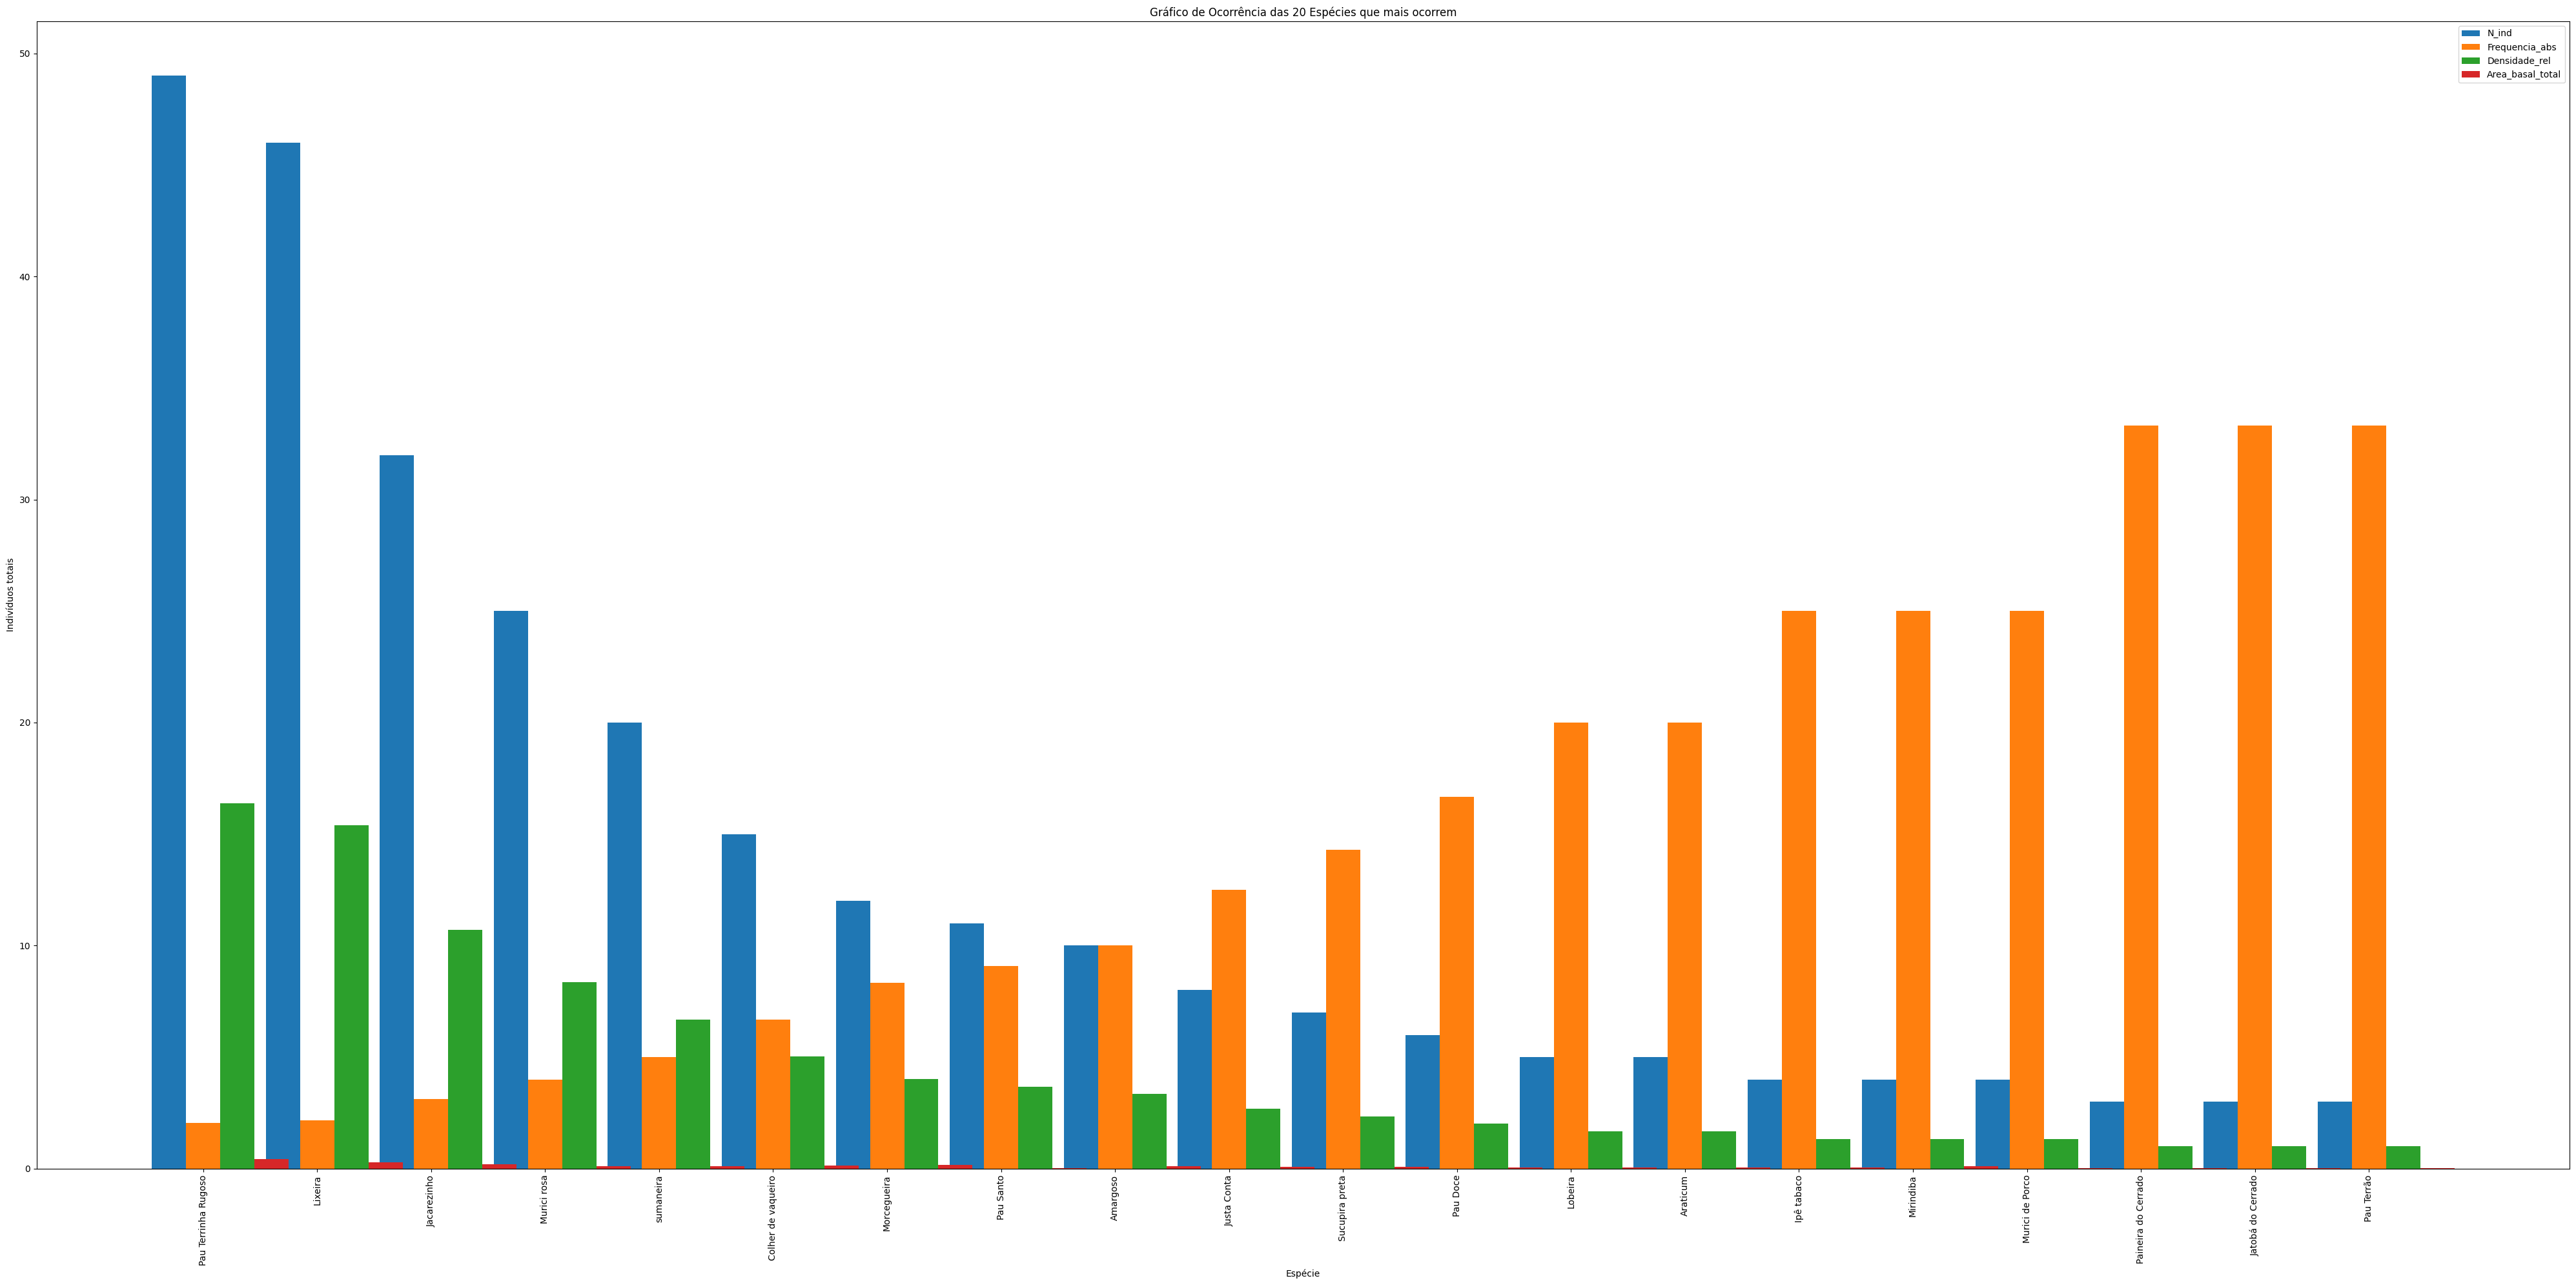

In [ ]:
# Selecionar os 20 primeiros registros do DataFrame
top_20 = ocorrencia3.head(20)

# Criar o gráfico de barras
fig, ax = plt.subplots(figsize=(40, 20))
x = list(range(len(top_20)))  # Converter x para uma lista
width = 0.3

# Plotar as barras para cada coluna
ax.bar([val - width for val in x], top_20['N_ind'], width, label='N_ind')
ax.bar(x, top_20['Frequencia_abs'], width, label='Frequencia_abs')
ax.bar([val + width for val in x], top_20['Densidade_rel'], width, label='Densidade_rel')
ax.bar([val + 2*width for val in x], top_20['Area_basal_total'], width, label='Area_basal_total')

# Configurar os eixos e os rótulos
ax.set_xlabel('Espécie')
ax.set_ylabel('Indivíduos totais')
ax.set_title('Gráfico de Ocorrência das 20 Espécies que mais ocorrem')
ax.set_xticks(x)
ax.set_xticklabels(top_20['Nome_Popular'], rotation=90)

# Adicionar a legenda
ax.legend()

# Exibir o gráfico
plt.tight_layout()
plt.show()


In [ ]:
plt.savefig('Grafico1.jpg', format='jpg')

<Figure size 640x480 with 0 Axes>

#Obrigado!!#
.
.

**Evaldo Oestreich Filho**

*MSc. Engenheiro Florestal*

*Data Analyst*